# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


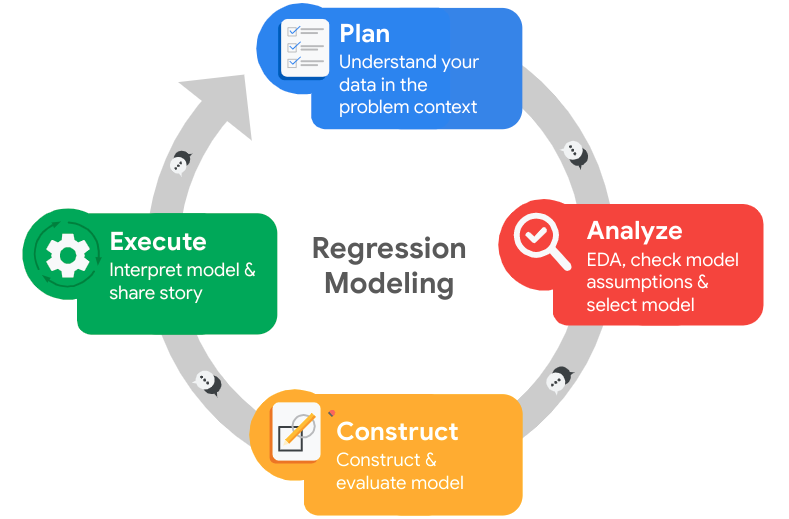

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Salifort Motors senior leadership
2. Trying to build a predictive model for employee turnover. I anticipate the impact of this work to be significant as it can help leaders know how to better retain employees. This will save the company time and money.
3. So far, it looks like we have a mix of numerical and operational data. I imagine the variable "left" will be our dependent variable. 
4. Will need to use Python and Tableau to conduct the analysis. Will be referring back to past projects in this program to ensure analysis is conducted correctly.
5. The only ethical consideration I have is ensuring that this model is not used to wrongly terminate employees. Employees marked as likely to quit should be given proper attention, but not singled out in a negative way.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [47]:
# Import packages
### YOUR CODE HERE ### 

# import the basics for data cleaning / visualizing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# now import relevant data modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# to save the model
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns = {'Work_accident': 'work_accident',
                           'average_montly_hours': 'average_monthly_hours',
                           'Department': 'department',
                           'time_spend_company': 'tenure'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Boxplot of the distribution of Tenure')

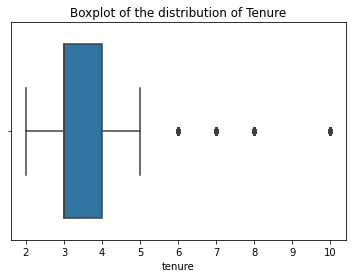

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x = df1['tenure'])
plt.title('Boxplot of the distribution of Tenure')


In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# 25th percentile of tenure
percentile25 = df1['tenure'].quantile(0.25)

# 75th percentile of tenure
percentile75 = df1['tenure'].quantile(0.75)

# IQR of tenure
iqr = percentile75 - percentile25

# finding the upper and lower limit for tenure outliers
upper_limit = percentile75 + iqr * 1.5
lower_limit = percentile25 - iqr * 1.5

# identifying outliers
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# print the number of rows containg outliers
print('# of rows with outliers:', len(outliers))


# of rows with outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Average hours, number of projects, and last evaluation score are all correlated with one another. Also noted that whether
or not an employee left is negatively correlated with satisfaction level.
2. More hours worked has more employees who have left.
3. I made no transformations. A transformation I could have made would be sorting tenure into high/low.
4. In order to check that the data meets the models' assumptions and in order to clean and transform the data so that it works for the model.
5. Again, referring back to past projects.
6. None further than the ethical considerations I stated above.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize = True))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Histogram of the number of projects')

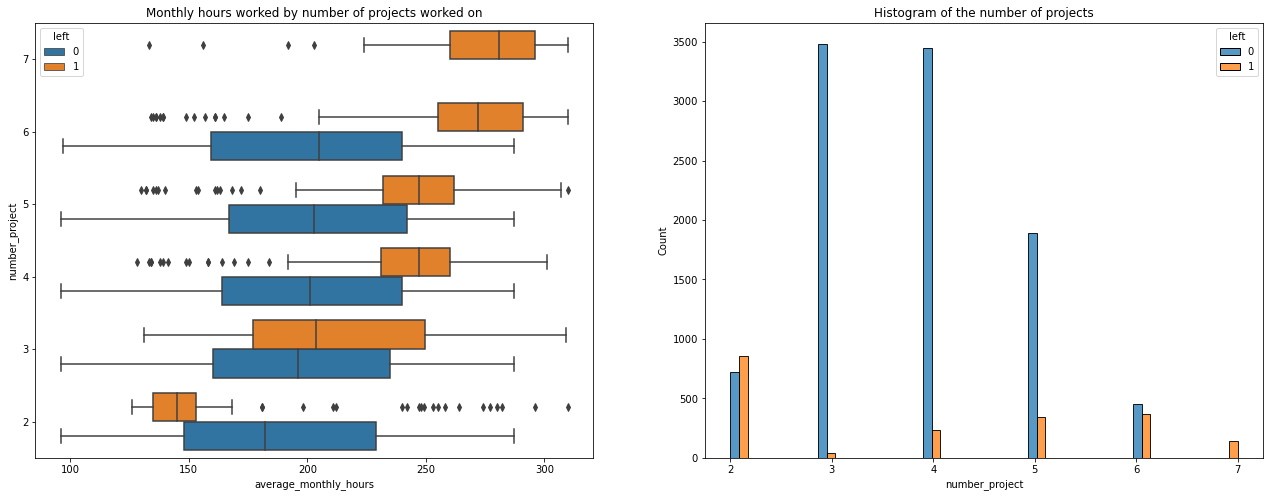

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# boxplot for number_project by average_monthly_hours
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', ax = ax[0], orient = 'h', hue = 'left')
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours worked by number of projects worked on')

# histogram to show another view of the distribution of number_project
sns.histplot(data = df1, x = 'number_project', ax = ax[1], hue = 'left', multiple = 'dodge')
ax[1].set_title('Histogram of the number of projects')


## as shown in the graphs created in this code block, all employees who worked 7 projects left, and you can also see
## that at 2 projects, employees who worked less average hours left more. It would appear that 3-5 projects may be
## optimal for retaining employees, and keeping average monthly hours under 250. ##

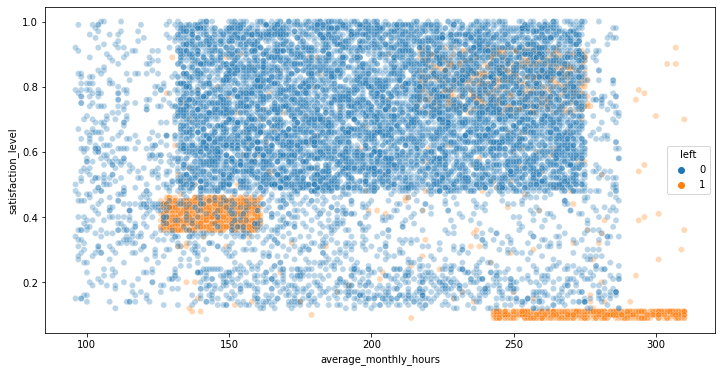

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###

# look at average monthy hours vs employee satisfaction
plt.figure(figsize = (12,6))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.3)

## this scatterplot shows that some employees who have worked the most monthly hours (250+) have lower satisfaction,
## as well as some in the 125-150 hour range. There is also a group who have left in the 125-275 hour range but they have
## relatively high satisfaction.

Text(0.5, 1.0, 'Histogram of tenure')

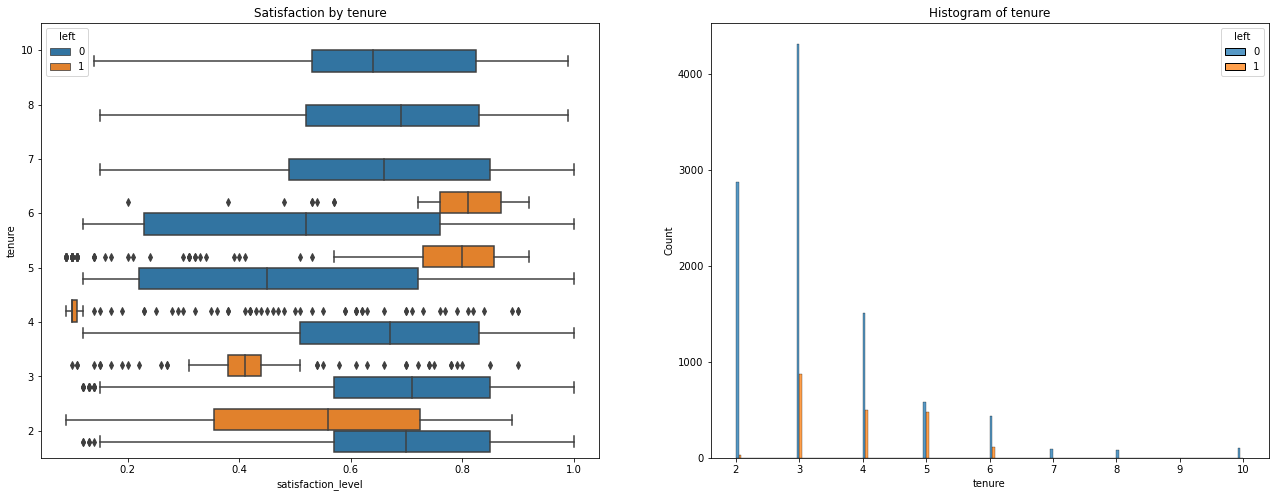

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###

# plotting satisfaction by tenure
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# boxplot for satisfaction by tenure
sns.boxplot(data = df1, x = 'satisfaction_level', y = 'tenure', ax = ax[0], orient = 'h', hue = 'left')
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure')

# histogram to show another view of the distribution of tenure
sns.histplot(data = df1, x = 'tenure', ax = ax[1], hue = 'left', multiple = 'dodge')
ax[1].set_title('Histogram of tenure')


## these plots show that the higher the tenure, the less amount who have left. However, there is a much smaller total count
## the higher you guy in tenure. There are barely any employees with 2 yeras of tenure that have left when looking at the
## histogram. Looking at the scatterplot, an interesting thing is that those who have left at 5 and 6 years of tenure
## have higher satisfaction.

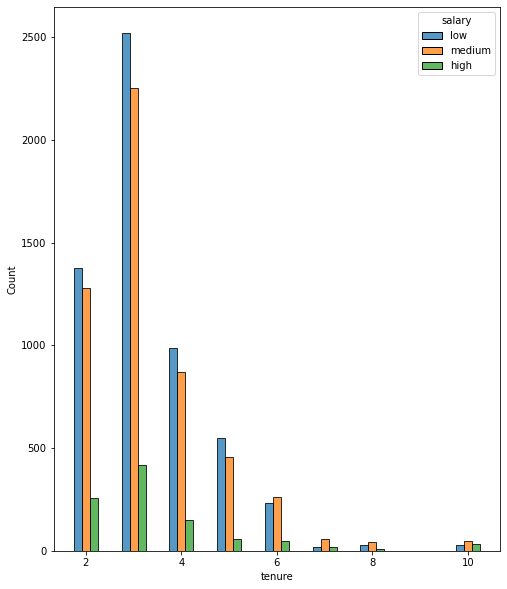

In [35]:
# Create a plot as needed
### YOUR CODE HERE ###

# investigating tenure by salary level
plt.figure(figsize = (8,10))
sns.histplot(data = df1, x = 'tenure', hue = 'salary', multiple = 'dodge', discrete = 1, shrink = 0.5)

## this histogram shows that longer tenure employees have a mixed distribution of salary range, while employees with less
## than 6 years of tenure don't have too many with a high salary

Text(0.5, 1.0, 'Average monthly hours by last evaluation score')

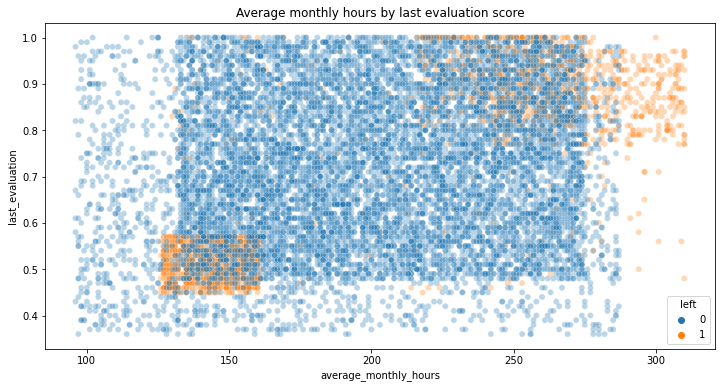

In [37]:
# Create a plot as needed
### YOUR CODE HERE ###

# look at average monthy hours vs last evaluation
plt.figure(figsize = (12,6))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.3)
plt.title('Average monthly hours by last evaluation score')

## This plot shows that there are 2 strong groupings of employees who left. You have those with 130-165 hours that have a lower
## evaluation of 0.4-0.6 and then those who worked more hours (225 - 300+) with high evaluation scores. To me, it's clear
## that the group who left with high evaluation scores likely left because they were overworked.

Text(0.5, 1.0, 'Average monthly hours by whether or not the employee was promoted in the last 5 years')

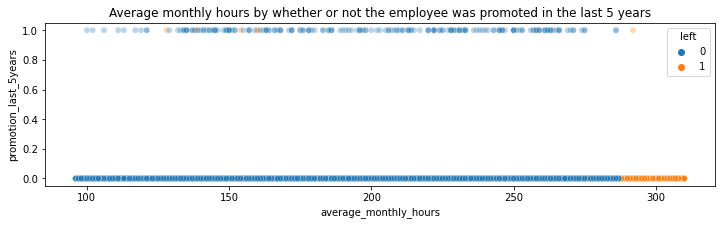

In [39]:
# Create a plot as needed
### YOUR CODE HERE ###

# looking at average monthly hours by promotion
plt.figure(figsize = (12,3))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.3)
plt.title('Average monthly hours by whether or not the employee was promoted in the last 5 years')

## Most employees who were promoted in the last 5 years have stayed. There's a chunk of employees who worked the most hours
## that were not promoted and left. 

Text(0.5, 1.0, 'Count of employees who stayed or left by department')

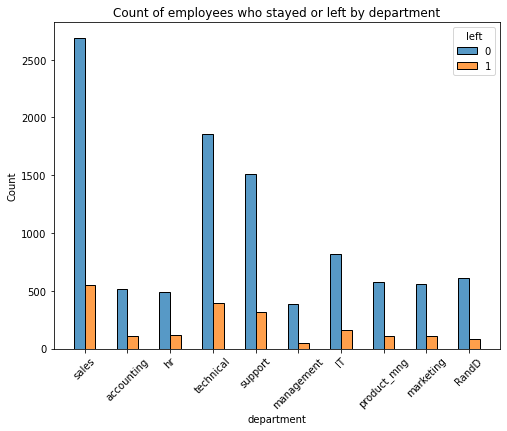

In [41]:
# Create a plot as needed
### YOUR CODE HERE ###

# looking at how many employees left by department
plt.figure(figsize = (8,6))
sns.histplot(data = df1, x = 'department', hue = 'left', multiple = 'dodge', discrete = 1, shrink = 0.5)
plt.xticks(rotation = '45')
plt.title('Count of employees who stayed or left by department')

## here we see that sales has the most departures, followed by technical and support, however they also have the most total
## employees. So there is not a proportion of employees that stands out by department

Text(0.5, 1.0, 'Correlations')

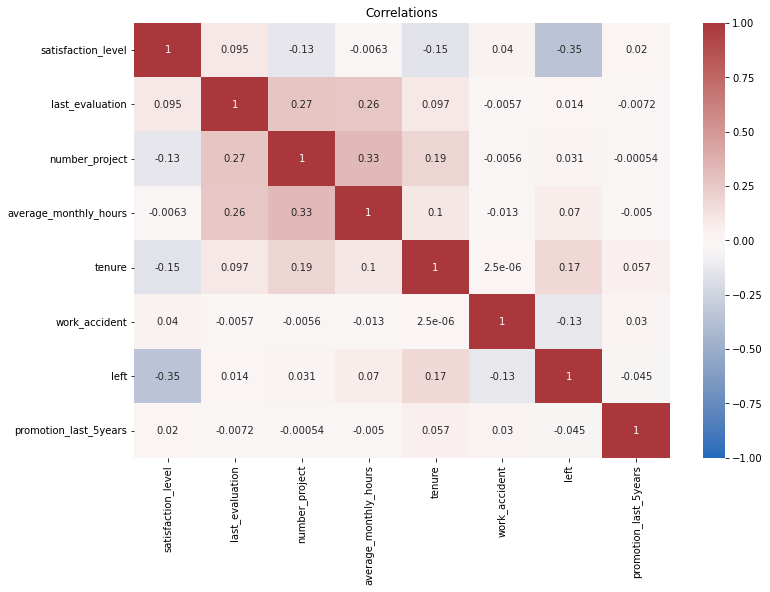

In [45]:
# Create a plot as needed
### YOUR CODE HERE ###

# correlation heatmap
plt.figure(figsize = (12,8))
heatmap = sns.heatmap(df1.corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette('vlag', as_cmap = True))
heatmap.set_title('Correlations')

## the heatmap shows us the correlations between variables. Here we can see that whether an employee leaves has negative
## correlation with satisfaction level. We can also see there is a cluster of variables that more strongly correlated
## to each other, those being: last_evaluation, number_project, and average_monthly_hours

### Insights

The plots show that it's likely employees are leaving due to being overworked and not being recognized for that work. These types of employees also tend to have lower satisfaction levels. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Not necessarily
2. I kept in all of the variables provided because I thought them all potentially impactful on leaving employees.
3. Yes, no two variables are highly correlated with one another and there ar eno duplicates.
4. Fairly well, the model has an avg precision of .79, recall of .82, and f1 score of .8
5. Yes there is room for improvement. I would resample the data so the classes are more balanced.
6. Referring to past projects
7. No, none further than mentioned earlier

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Predict whether an employee will leave or not. 

### Identify the types of models most appropriate for this task.

I will plan on using a Logistic Regression model since the dependent variable is a categorical binary. You could also use tree-based machine learning.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [50]:
### YOUR CODE HERE ###

# first we need to encode the categorical variables
df_enc = df1.copy()

# encode salary as ordinal
df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

# dummy encode department since there is no order
df_enc = pd.get_dummies(df_enc, drop_first = False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Correlations')

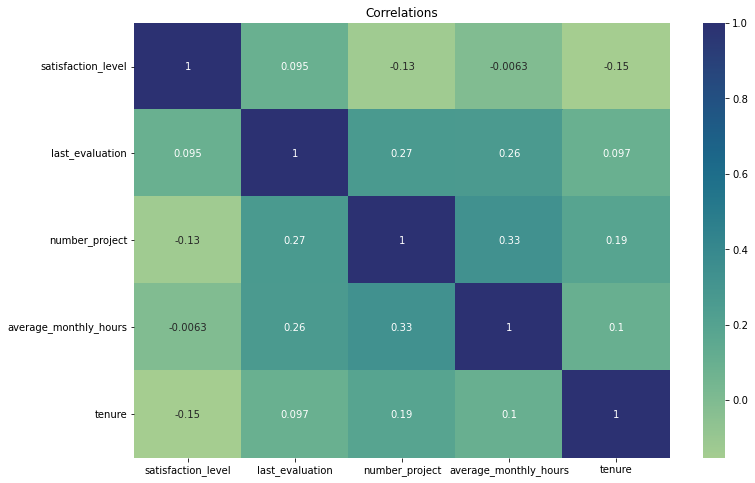

In [52]:
# Now we can check the correlation between variables that may be important
plt.figure(figsize = (12,8))
heatmap = sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
                      .corr(), annot = True, cmap = 'crest')
heatmap.set_title('Correlations')

In [53]:
# Next I will double check the dataset does not include any outliers
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
# Grab the outcome variable
y = df_logreg['left']

y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [55]:
# Select variables to include in the model
X = df_logreg.drop('left', axis = 1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
# Split the data into train/test sets. We'll do a 75/25 split as that is standard
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [57]:
# Construct the logistic regression model and fit it to the training data
log_clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)

In [59]:
# get predictions on the test set
y_pred = log_clf.predict(X_test)

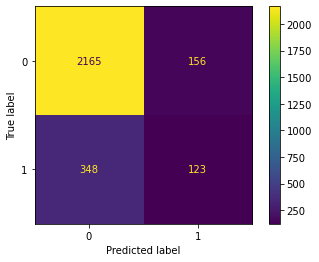

In [61]:
# Now create a confusion matrix to check accuracy
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)

# plot the matrix
log_disp.plot(values_format = '')
plt.show()

## the confusion matrix shows that there are a lot of true negatives predicted, with some false negatives and some false
## positives. This model is not perfect.

In [62]:
# check the class balance in order to interpret accuracy metrics
df_logreg['left'].value_counts(normalize = True)

## here we see that the data is not balanced, but it's not concerning enough to resample the data

0    0.831468
1    0.168532
Name: left, dtype: float64

In [64]:
# Create a classification report
target_names = ['Predicted to not leave', 'Predicted to leave']
print(classification_report(y_test, y_pred, target_names = target_names))

## the regression model has high precision, recal, and f1 score when it comes to predicting those who did not leave, however
## the model has lower scores when it comes to predicting those who did leave. Overall, the model has an avg precision of
## .79, recall of .82, and f1 score of .8

                        precision    recall  f1-score   support

Predicted to not leave       0.86      0.93      0.90      2321
    Predicted to leave       0.44      0.26      0.33       471

              accuracy                           0.82      2792
             macro avg       0.65      0.60      0.61      2792
          weighted avg       0.79      0.82      0.80      2792



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The model has an avg precision of .79, recall of .82, and f1 score of .8, as well as an accuracy of .83

### Conclusion, Recommendations, Next Steps

It was found that the model is fairly accurate at predicting whether an employee will leave or not.

Moving forward, I recommend that the company limit the total number of projects employees can work on and limit the number of hours worked. Also promote employees who have longer tenure. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.